<a href="https://colab.research.google.com/github/AkratiSachan23/PyTorch-for-Deep-Learning-Machine-Learning/blob/main/Neural_Network_Classification_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get Data Ready!


In [ ]:
## Make classification data
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# make 1000 samples
n_samples=1000
# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X:\n{X[:5]}")
print(f"First 5 samples of y:\n{y[:5]}")

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circles data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


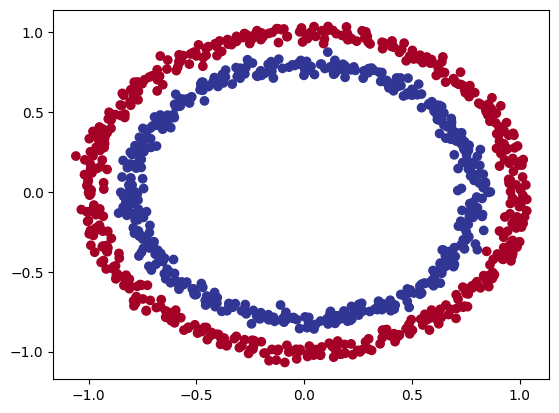

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [ ]:
# Check input and output shapes
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Turn data into tensors
import torch
torch.__version__

'2.6.0+cu124'

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
type(X), X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## **Build or pick a Pretrained model**

In [ ]:
## Building a Model
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2, #takes in 2 features and upscales to 5 features
                           out_features=5)
    self.layer_2=nn.Linear(in_features=5, # takes in 5 features from previous layer and outputs a single feature (same shape of y)
                           out_features=1)
  # define a forward() method that outlines the forward pass
  def froward(self,x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Replicate the model using nn.sequential (more simple version)
model_0=nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1065,  0.5714],
                      [ 0.2398,  0.5240],
                      [-0.3126, -0.2772],
                      [ 0.5767,  0.3478],
                      [-0.6364,  0.1794]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5375,  0.1571, -0.2267, -0.0792,  0.5376], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1489, -0.2224, -0.4403,  0.4410,  0.2152]], device='cuda:0')),
             ('1.bias', tensor([0.0276], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
print(f"Lenght of predictions:{len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Lenght of test samples:{len(X_train)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 Labels:\n{y_test[:10]}")

Lenght of predictions:200, Shape: torch.Size([200, 1])
Lenght of test samples:800, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.1002],
        [ 0.2040],
        [-0.0727],
        [ 0.1488],
        [ 0.0844],
        [ 0.1465],
        [ 0.3141],
        [ 0.3010],
        [-0.0791],
        [ 0.2127]], device='cuda:0')

First 10 Labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## **Setup loss function(how wrong your model predictions are) and optimizer**
#### *Regression:* MAE or MSE (mean absolute error or mean squared error)
#### *Classification:* binary cross entropy or categorical cross entropy
#### And for **Optimizers**, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.


In [ ]:
# loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn= nn.BCEWithLogitsLoss() # It is a sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [ ]:
# Calculate Accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

## **Train a Model**
 Pytorch Training loop steps
 1. Forward Pass
 2. Calculate the loss
 3. Zero Gradients
 4. Perform backpropagation on the loss
 5. Set the Optimizer ( Gradient Descent )

#### Raw logits -> prediction probabilities -> prediction labels
##### Model ouputs are going to be raw **Logits**
#### We can convert these **Logits** into **prediction probabilities** by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification.)
#### Then convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the ``argmax()``



In [ ]:
# View first 5 outputs of the forward pass o the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1002],
        [ 0.2040],
        [-0.0727],
        [ 0.1488],
        [ 0.0844]], device='cuda:0')

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1065,  0.5714],
                      [ 0.2398,  0.5240],
                      [-0.3126, -0.2772],
                      [ 0.5767,  0.3478],
                      [-0.6364,  0.1794]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.5375,  0.1571, -0.2267, -0.0792,  0.5376], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1489, -0.2224, -0.4403,  0.4410,  0.2152]], device='cuda:0')),
             ('1.bias', tensor([0.0276], device='cuda:0'))])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5250],
        [0.5508],
        [0.4818],
        [0.5371],
        [0.5211]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)


In [ ]:
# Find predicted labels
y_preds=torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_preds=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_probs.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([False, False, False, False, False], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set number of epochs
epochs=100

# Put data to target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test =X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  # Training
  model_0.train()

  # Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  # Calculate loss/accuracy
  loss=loss_fn(torch.sigmoid(y_logits),
               y_train)
  loss=loss_fn(y_logits,
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss Backward
  loss.backward()
  # Optimizer step (gradient descent)
  optimizer.step()

  # TESTING
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #Calculate test loss/acc
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

  # Print out what's happenin'
  if epoch%10==0:
    print(f"Epoch: {epoch}  | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:5f}, Test acc: {test_acc:.2f}%")

Epoch: 0  | Loss: 0.69553, Acc: 53.00% | Test loss: 0.700984, Test acc: 47.00%
Epoch: 10  | Loss: 0.69445, Acc: 52.75% | Test loss: 0.699064, Test acc: 47.00%
Epoch: 20  | Loss: 0.69394, Acc: 51.88% | Test loss: 0.697922, Test acc: 46.50%
Epoch: 30  | Loss: 0.69366, Acc: 51.50% | Test loss: 0.697156, Test acc: 48.00%
Epoch: 40  | Loss: 0.69347, Acc: 51.00% | Test loss: 0.696602, Test acc: 48.00%
Epoch: 50  | Loss: 0.69335, Acc: 50.50% | Test loss: 0.696183, Test acc: 48.00%
Epoch: 60  | Loss: 0.69326, Acc: 50.50% | Test loss: 0.695859, Test acc: 47.50%
Epoch: 70  | Loss: 0.69319, Acc: 51.00% | Test loss: 0.695605, Test acc: 48.00%
Epoch: 80  | Loss: 0.69315, Acc: 50.88% | Test loss: 0.695402, Test acc: 48.00%
Epoch: 90  | Loss: 0.69311, Acc: 50.38% | Test loss: 0.695241, Test acc: 48.00%


## Make prediction and evaluate the model
From matrix looks like model isn't learning anything...
So to inspect it let's make some predictions and make them visual
In other words,, "Visualize, visualize, visualize!"

In [ ]:
from urllib import request
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Helper_functions.py aleady exists")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

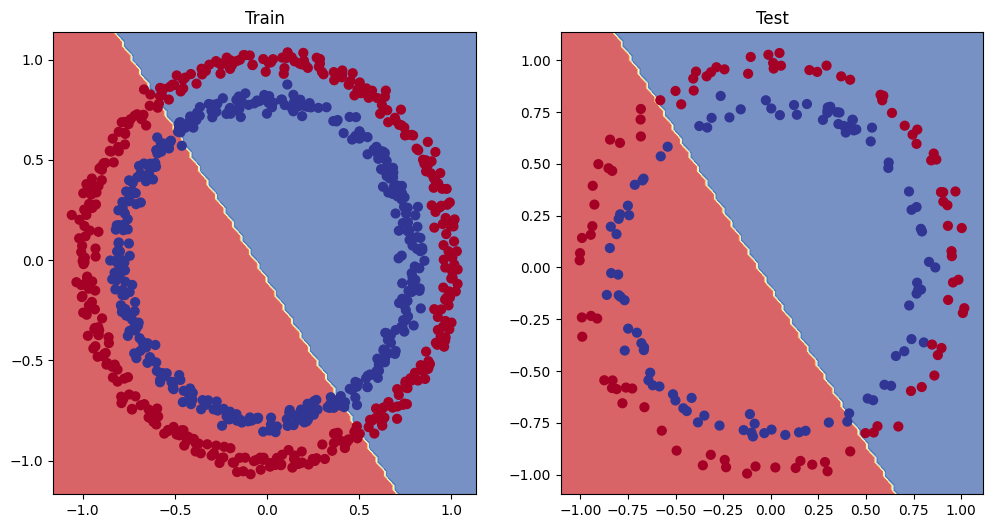

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## Improving a model
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fits for longer
* Changing the activation functions
* Changing the learning rate
* Change the loss function

##### Hyperparameters

Lets try and improve our model by:
* Adding more hidden units: 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    #z= self.layer_1(x)
    #z= self.layer_2(z)
    #z= self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn=nn.BCEWithLogitsLoss()

# Set an optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# Write a training and evaluation loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs=100

# Put data on target device
X_train, y_train=X_train.to(device), y_train.to(device)
X_test, y_test=X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Training
  model_1.train()
  # Forward Pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # logits -> pred_probabilities -> prediction labels
  # Calculate the loss/acc
  loss=loss_fn(y_logits,
               y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss backward (backpropagation)
  loss.backward()
  # Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # Forward Pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    # Calculate the loss
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch}  | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:5f}, Test acc: {test_acc:.2f}%")

Epoch: 0  | Loss: 0.69396, Acc: 50.88% | Test loss: 0.692615, Test acc: 51.00%


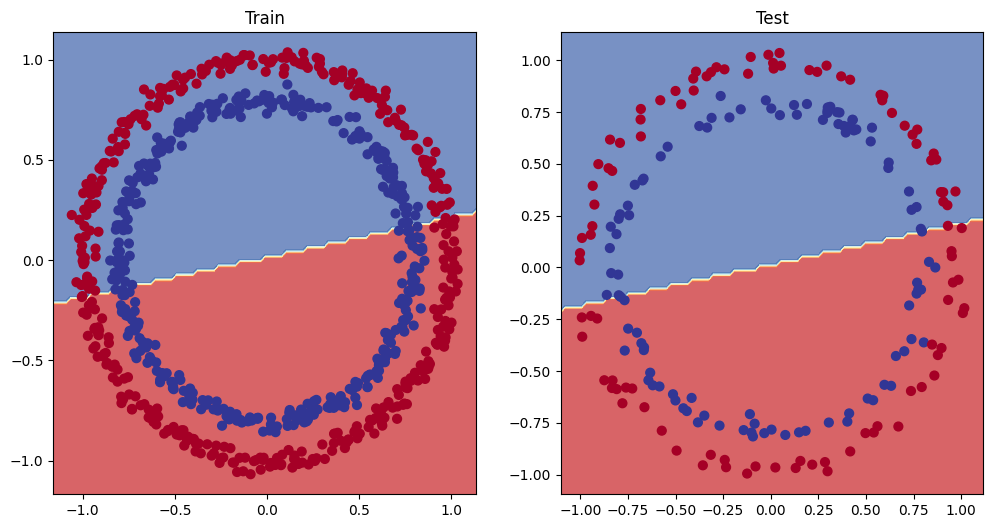

In [ ]:
# Plot decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Preparing data to see if our model can fit a straight line
one way to troubleshoot to a larger problem is to test out a smaller problem

In [ ]:
# Create some data
weight=0.7
bias=0.3
start=0
end=1
step=0.01

# Create data
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias # Linear Regression formula
# Check data
print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test split
train_split=int(0.8*len(X_regression))
X_train_regression, y_train_regression=X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression=X_regression[train_split:], y_regression[train_split:]

# Check lengths of each
len(X_train_regression),len(X_test_regression), len(y_train_regression),len(y_test_regression)

(80, 20, 80, 20)

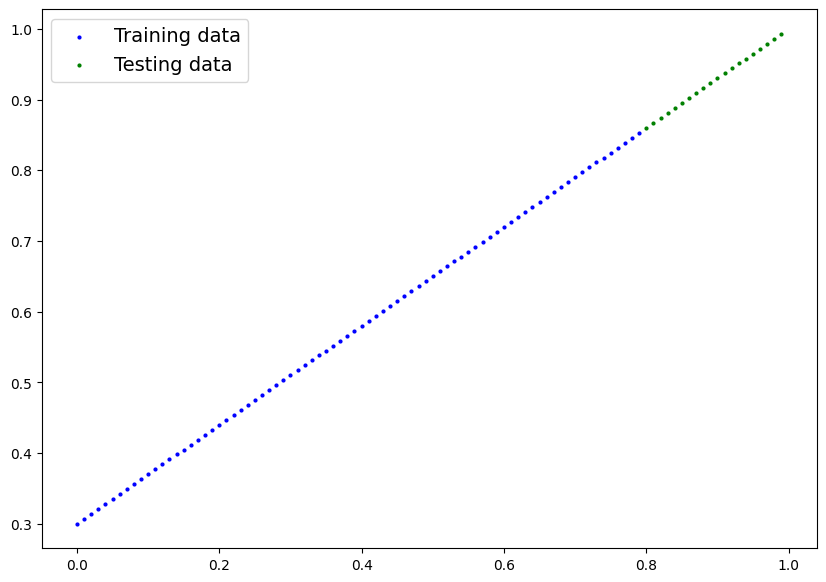

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

## Adjusting `model_1` to fit a straight line

In [ ]:
model_2=nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [ ]:
# Train model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000
# Put data on target device
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression, y_test_regression=X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred, y_test_regression)

  if epoch % 100 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


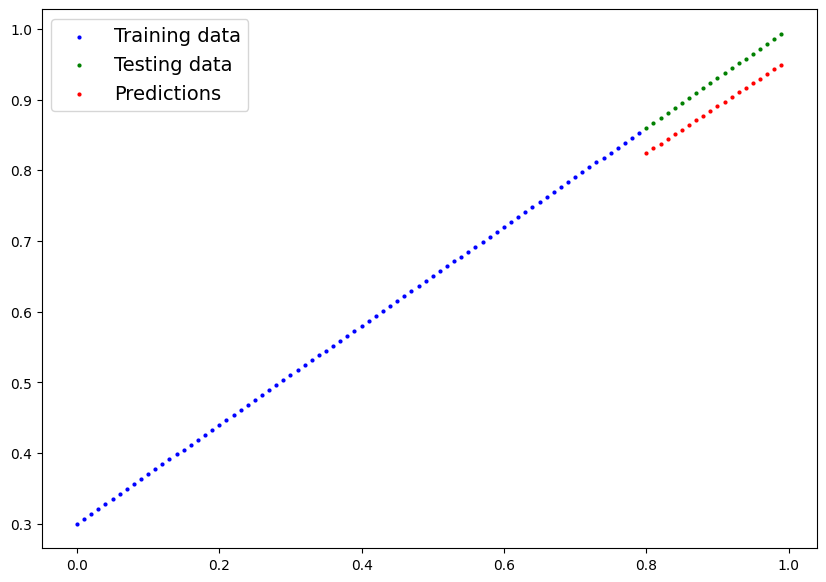

In [ ]:
# Turn on evaluation mode
model_2.eval()
# Make predictions (inference)
with torch.inference_mode():
  y_preds=model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## The missing piece: non-linearity
"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in Machine learning terms, an infinite (but really it is finite) of linear and non-linear functions?

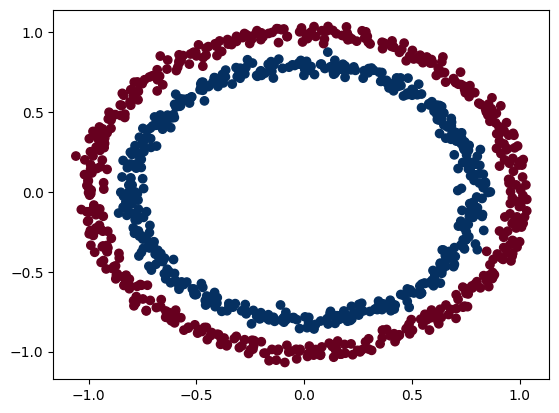

In [ ]:
## Recreating non-linear data (red-and blue circles)
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples=1000

X,y= make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdBu);

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Building a model with non-linearity

In [ ]:
# --Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # non-linearity

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3=CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup Loss and optimizer
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(),
                          lr=0.1)

In [ ]:
# Training a model with Non-Linearity
## Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## Put all data on target device
X_train, y_train=X_train.to(device),y_train.to(device)
X_test, y_test=X_test.to(device),y_test.to(device)

# Loop through data
epochs=1000

for epoch in range(epochs):
  ### Training
  model_3.train()
  # Forward Pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  # Calculate loss
  loss=loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train,
                   y_pred=y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss Backward
  loss.backward()
  # Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test,
                        y_pred=test_pred)
  # Print out what's happenin'
  if epoch%100==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test Loss: 0.6932, Test Acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test Loss: 0.6910, Test Acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test Loss: 0.6894, Test Acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test Loss: 0.6872, Test Acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test Loss: 0.6841, Test Acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test Loss: 0.6794, Test Acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test Loss: 0.6729, Test Acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test Loss: 0.6632, Test Acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test Loss: 0.6476, Test Acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test Loss: 0.6215, Test Acc: 79.00%


## Evaluating a model trained with on non-linear activation functions

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

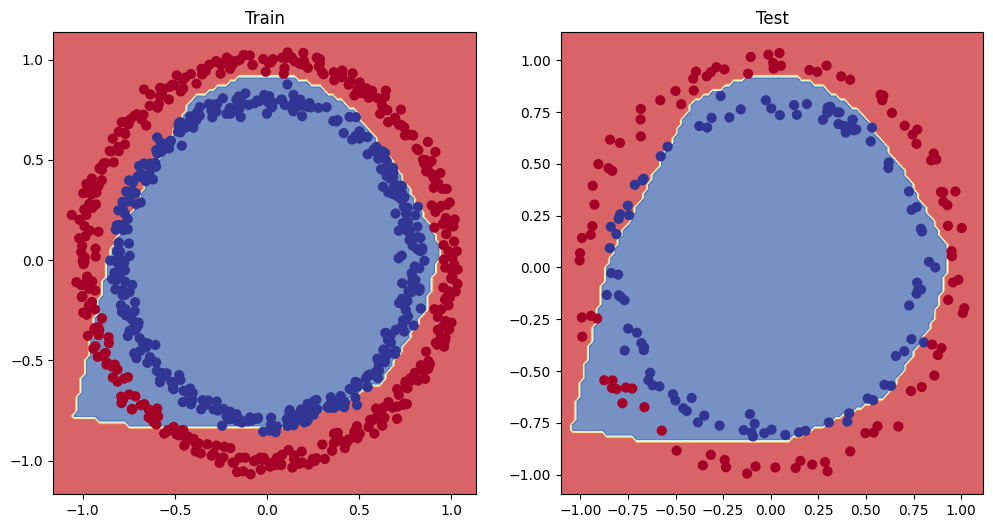

In [ ]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## Replicating non-linear activation functions

Neural Networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own. <br>
And these tools are linear & non-linear functions.

In [ ]:
# create a tensor
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

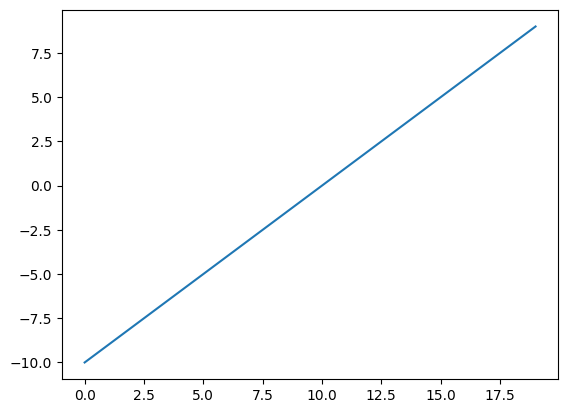

In [ ]:
plt.plot(A);